# Расчетная работа по курсу: Теория вероятности и статистика<br/>Раздел 2

## Импортируем все необходимые библиотеки

Здесь:
- Numpy (`numpy` или `np`) - общий модуль для работы с тензорами и статистических вычислений

- SciPy
    - `stats` - для получения равномерно распределенной случайной величины из модуля `uniform`

- MatPlotLib (`matplotlib.pyplot` или `plt`) - для графиков

- Regex (`re`) - встроенный модуль для работы с регулярными выражениями

In [1]:
import numpy as np

from scipy import stats
from scipy import optimize
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import re

## Вводим данные по варианту и `SEED` для повторяемости результатов
Константы:
<br/>$n=500$
<br/>
<br/>$MX=3.9$
<br/>$MY=-0.7$
<br/>
<br/>$DX=4.3$
<br/>$DY=12.96$
<br/>
<br/>$r_{XY}=-0.05$
<br/>
<br/>$\gamma=0.9$
<br/>$\alpha=0.025$

<br/><br/>Где:
<br/>$n$ - объем выборки
<br/>$MX, MY$ - мат. ожидание случайных величин $X$ и $Y$ соотвественно
<br/>$DX, DY$ - дисперсия случайных величин $X$ и $Y$ соотвественно
<br/>
<br/>$r_{XY}$ - нормированный корреляционный момент, высчитывается по формуле $r_{XY}=\dfrac{R_{XY}}{\sigma_X \sigma_Y}$
<br/>
<br/>$R_{XY}$ - корреляционный момент, высчитывается по формуле $R_{XY} = \textit{MXY} - \textit{MX} \ \textit{MY}$
<br/>
<br/>$\alpha$ - уровень значимости
<br/>$\gamma$ - доверительный интервал

In [2]:
n = 500      # Объем выборки

MX = 3.9     # Мат. ожидание X
MY = -0.7    # Мат. ожидание Y

DX = 4.3     # Дисперсия X
DY = 12.96   # Дисперсия Y

r = -0.05    # Нормированный корреляционный момент

SEED = 0     # Для повторяемости результатов

SIGMA_X = np.sqrt(DX)
SIGMA_Y = np.sqrt(DY)

## 3.0 Моделирование случайной величины

### 3.0.1 Для моделирования случайной величины необходимо найти корреляционную матрицу $R_{XY}$

Корреляционная матрица находиться по следующей формуле:
$$\displaystyle
    R = \begin{pmatrix}
            DX & R_{XY} \\
            R_{XY} & DY
        \end{pmatrix}
$$

Где корреляционный момент $R_{XY}$, считается по формуле:
$$\displaystyle
    R_{XY} = \textit{MXY} - \textit{MX} \ \textit{MY}
$$
Но из-за известного нормированого корреляционного момента, будем считать так:
$$\displaystyle
    r_{XY}=\frac{R_{XY}}{\sigma_X \sigma_Y} \Rightarrow R_{XY} = r_{XY} \sigma_X \sigma_Y
$$

In [3]:
R_XY = r * SIGMA_X * SIGMA_Y
print(f"Корреляционный момент: {R_XY}")

Корреляционный момент: -0.37325594435989895


Тогда корреляционная матрица:

In [4]:
R = (
    (DX, R_XY),
    (R_XY, DY)
)
print(f"Корреляционная матрица: \n( {DX}  , {np.round(R_XY, 3)})\n({np.round(R_XY, 3)},  {DY})")

Корреляционная матрица: 
( 4.3  , -0.373)
(-0.373,  12.96)


### 3.0.2 Моделируем случайный вектор используя `stats.multivariate_normal.rvs`
В функцию необходимо передать значения мат. ожиданий и корреляционную матрицу.

In [5]:
vector_XY: np.ndarray = stats.multivariate_normal.rvs(mean=(MX, MY), cov=R, size=n, random_state=SEED * 20)
x: np.ndarray = vector_XY[:, 0]
y: np.ndarray = vector_XY[:, 1]


print(f"Первые пара значений вектора (X, Y):\n({str(vector_XY[0])[1:-1]}), ({str(vector_XY[1])[1:-1]})...")

Первые пара значений вектора (X, Y):
(4.45433981 5.68424789), (8.38230643 3.02173509)...


## 3.1 Найти точечные оценки параметров распределения
То есть $MX$, $MY$, $DX$, $DY$, $r_{XY}$

### 3.1.1 Найдем MX и DX

Ищем выборочную среднюю и дисперсию, для этого воспользуемся формулами:
$$\displaystyle
    \bar{X} = \frac 1n \sum^n_{i=1} x_i
$$

$$\displaystyle
    S^2_X = \frac 1n \sum^n_{i=1} (x_i - \bar{X})^2
$$

In [6]:
sample_average_X = x.sum() / n

sum_tmp = 0

for i in range(n):
    sum_tmp += (x[i] - sample_average_X) ** 2

sample_variance_X = sum_tmp / n

print(
    f"Выборочная  средняя  X: {sample_average_X}\n" +
    f"Выборочная дисперсия X: {sample_variance_X}\n"
)

Выборочная  средняя  X: 3.8581186729657255
Выборочная дисперсия X: 4.304722268579281



### 3.1.2 Найдем MY и DY

Снова ищем выборочные значения:
$$\displaystyle
    \bar{Y} = \frac 1n \sum^n_{i=1} x_i
$$

$$\displaystyle
    S^2_Y = \frac 1n \sum^n_{i=1} (x_i - \bar{Y})^2
$$

In [7]:
sample_average_Y = y.sum() / n

sum_tmp = 0

for i in range(n):
    sum_tmp += (y[i] - sample_average_Y) ** 2

sample_variance_Y = sum_tmp / n

print(
    f"Выборочная  средняя  Y: {sample_average_Y}\n" +
    f"Выборочная дисперсия Y: {sample_variance_Y}\n"
)

Выборочная  средняя  Y: -0.9374818083913952
Выборочная дисперсия Y: 12.277260021515875



### 3.1.3 Найдем коэффицент корреляции

Выборочный коэффицент корреляции находят по этой формуле:
$$
    \hat{r}_{XY} = \dfrac{
                            \displaystyle\sum^n_{i=1}x_i y_i - n \bar{X} \bar{Y}
                        }
                        {\sqrt{
                            \Big( 
                                \displaystyle\sum^n_{i=1}x_i^2 - n \bar{X}^2 
                            \Big)
                            \Big( 
                                \displaystyle\sum^n_{i=1}y_i^2 - n \bar{Y}^2 
                            \Big)}
                        }
$$

In [8]:
sample_r = np.sum(x * y) - n * sample_average_X * sample_average_Y
sample_r /= np.sqrt((np.sum(x**2) - n * sample_average_X**2) * (np.sum(y**2) - n * sample_average_Y**2))

print(f"Выборочный коффицент корреляции: {sample_r}")

Выборочный коффицент корреляции: -0.05777788554806056


## 3.2 Проверить гипотезу о независимости случайных величин $X$ и $Y$

### 3.2.1 Группируем выборочные данные и ищем частоты

#### Сначала для $X$

##### Строим вариационный ряд

In [9]:
var_ser_x = x.copy()
var_ser_x.sort()
print(f"Вариационный ряд X: {re.sub(" +", ", ", str(var_ser_x[:4])[1:-1])}...")

Вариационный ряд X: -2.33823126, -1.91126893, -1.89510633, -1.85981005...


##### Разбиваем на непересекающиеся интервалы
Найдем мин. и макс. значение в ряде

In [10]:
print(f"Минимальное: {min(var_ser_x)}")
print(f"Максимальное: {max(var_ser_x)}")

Минимальное: -2.338231255006906
Максимальное: 9.531457700879269


Кол-во интервалов, $N = K = L = [1+3.32 \lg n] + 1 = 10$

In [11]:
N = 3

Считаем длины интервалов: $$h=\frac{x_{max}-x_{min}}{N}$$

In [12]:
h_X = (max(var_ser_x) - min(var_ser_x)) / N
print(f"Длина интервала: {h_X}")

Длина интервала: 3.956562985295392


##### Получаем интервалы

In [13]:
J_X = [[min(var_ser_x) + k * h_X, min(var_ser_x) + (k + 1) * h_X] for k in range(N)]

for (i, interval) in enumerate(J_X):
    print(f"Интервал {i + 1}: {str(interval)[:-1]})")

Интервал 1: [-2.338231255006906, 1.6183317302884856)
Интервал 2: [1.6183317302884856, 5.574894715583877)
Интервал 3: [5.574894715583877, 9.531457700879269)


Разбиваем на интервалы

In [14]:
stat_series_X = [[] for _ in range(len(J_X))]

for xi in var_ser_x:
    for i in range(len(J_X)):
        if (J_X[i][0] <= xi < J_X[i][1]):
            stat_series_X[i].append(xi)
stat_series_X[-1].append(max(var_ser_x))

##### Теперь подсчитаем частоты

In [15]:
frequencies_X = []

for interval in stat_series_X:
    frequencies_X.append(len(interval))

relative_frequencies_X = [frequency / n for frequency in frequencies_X]

print(f"Частоты: {frequencies_X}")
print(f"Сумма частот: {sum(frequencies_X)}", end="\n\n")

print(f"Относительные частоты: {relative_frequencies_X}")
print(f"Сумма относительных частот: {sum(relative_frequencies_X)}")

Частоты: [73, 325, 102]
Сумма частот: 500

Относительные частоты: [0.146, 0.65, 0.204]
Сумма относительных частот: 1.0


#### Теперь для $Y$

##### Строим вариационный ряд

In [16]:
var_ser_y = y.copy()
var_ser_y.sort()
print(f"Вариационный ряд X: {re.sub(" +", ", ", str(var_ser_y[:4])[1:-1])}...")

Вариационный ряд X: -10.21615725, -10.09788617, -9.82980944, -9.20661768...


##### Разбиваем на непересекающиеся интервалы
Найдем мин. и макс. значение в ряде

In [17]:
print(f"Минимальное: {min(var_ser_y)}")
print(f"Максимальное: {max(var_ser_y)}")

Минимальное: -10.21615725060077
Максимальное: 8.996865961719875


Считаем длины интервалов: $$h=\frac{x_{max}-x_{min}}{N}$$

In [18]:
h_Y = (max(var_ser_y) - min(var_ser_y)) / N
print(f"Длина интервала: {h_Y}")

Длина интервала: 6.4043410707735475


##### Получаем интервалы

In [19]:
J_Y = [[min(var_ser_y) + k * h_Y, min(var_ser_y) + (k + 1) * h_Y] for k in range(N)]

for (i, interval) in enumerate(J_Y):
    print(f"Интервал {i + 1}: {str(interval)[:-1]})")

Интервал 1: [-10.21615725060077, -3.811816179827222)
Интервал 2: [-3.811816179827222, 2.5925248909463257)
Интервал 3: [2.5925248909463257, 8.996865961719873)


Разбиваем на интервалы

In [20]:
stat_series_Y = [[] for _ in range(len(J_Y))]

for yi in var_ser_y:
    for i in range(len(J_Y)):
        if (J_Y[i][0] <= yi < J_Y[i][1]):
            stat_series_Y[i].append(yi)
stat_series_Y[-1].append(max(var_ser_y))

##### Теперь подсчитаем частоты

In [21]:
frequencies_Y = []

for interval in stat_series_Y:
    frequencies_Y.append(len(interval))

relative_frequencies_Y = [frequency / n for frequency in frequencies_Y]

print(f"Частоты: {frequencies_Y}")
print(f"Сумма частот: {sum(frequencies_Y)}", end="\n\n")

print(f"Относительные частоты: {relative_frequencies_Y}")
print(f"Сумма относительных частот: {sum(relative_frequencies_Y)}")

Частоты: [101, 317, 82]
Сумма частот: 500

Относительные частоты: [0.202, 0.634, 0.164]
Сумма относительных частот: 1.0


#### Теперь частоты прямоуголников, то есть $\nu_{ij}$

##### Найдем прямоугольники

In [22]:
rectangles = []

for side_X in J_X:
    for side_Y in J_Y:
        rectangles.append([side_X, side_Y])

for (i, rectangle) in enumerate(rectangles):
    print(f"Прямоугольник {i + 1}:\n\t" +
          f"Сторона X: [{str(np.round(rectangle[0], 3))[1:-1]})\n\t" +
          f"Сторона Y: [{str(np.round(rectangle[1], 3))[1:-1]})")

Прямоугольник 1:
	Сторона X: [-2.338  1.618)
	Сторона Y: [-10.216  -3.812)
Прямоугольник 2:
	Сторона X: [-2.338  1.618)
	Сторона Y: [-3.812  2.593)
Прямоугольник 3:
	Сторона X: [-2.338  1.618)
	Сторона Y: [2.593 8.997)
Прямоугольник 4:
	Сторона X: [1.618 5.575)
	Сторона Y: [-10.216  -3.812)
Прямоугольник 5:
	Сторона X: [1.618 5.575)
	Сторона Y: [-3.812  2.593)
Прямоугольник 6:
	Сторона X: [1.618 5.575)
	Сторона Y: [2.593 8.997)
Прямоугольник 7:
	Сторона X: [5.575 9.531)
	Сторона Y: [-10.216  -3.812)
Прямоугольник 8:
	Сторона X: [5.575 9.531)
	Сторона Y: [-3.812  2.593)
Прямоугольник 9:
	Сторона X: [5.575 9.531)
	Сторона Y: [2.593 8.997)


Разбиваем на интервалы

In [23]:
stat_series_rect = [[] for _ in range(len(rectangles))]

for (xi, yi) in (vector_XY):
    for (i, (side_X, side_Y)) in enumerate(rectangles):
        if (side_X[0] <= xi < side_X[1]) and (side_Y[0] <= yi < side_Y[1]):
            stat_series_rect[i].append((xi, yi))

stat_series_rect[-1].append(vector_XY[vector_XY[:, 0].argmax()])
stat_series_rect[-1].append(vector_XY[vector_XY[:, 1].argmax()])

##### Посчитаем частоты

In [24]:
frequencies_rect = []

for rect in stat_series_rect:
    frequencies_rect.append(len(rect))

relative_frequencies_rect = [frequency / n for frequency in frequencies_rect]

print(f"Частоты: {frequencies_rect}")
print(f"Сумма частот: {sum(frequencies_rect)}", end="\n\n")

print(f"Относительные частоты: {relative_frequencies_rect}")
print(f"Сумма относительных частот: {sum(relative_frequencies_rect)}")

Частоты: [11, 49, 13, 64, 206, 54, 26, 61, 16]
Сумма частот: 500

Относительные частоты: [0.022, 0.098, 0.026, 0.128, 0.412, 0.108, 0.052, 0.122, 0.032]
Сумма относительных частот: 1.0


### 3.2.2 Ищем критерий независимости

Для проверки гипотезы необходимо посчитать критерий независимости:
$$
    \chi_n^2 = n \Big( \displaystyle\sum^K_{i=1} \displaystyle\sum^L_{i=1} \dfrac{\nu^2_{ij}}{\nu^X_i \nu^Y_j}  - 1\Big)
$$

где $K$ и $L$ - число интервалов для $X$ и $Y$ соотвественно
<br/>$\nu^X_i$ и $\nu^Y_j$ - частоты интервалов $X$ и $Y$ соотвественно
<br/>$\nu_{ij}$ - частота прямоугольника со сторонами в виде $i$-го и $j$-го интервалов соотвественно

In [25]:
sum_tmp = 0
ij = 0

for i in range(N):
    for j in range(N):
        sum_tmp += frequencies_rect[ij]**2 / (frequencies_X[i] * frequencies_Y[j])
        ij += 1

chi = n * (sum_tmp - 1)
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 2.903077924191866


### 3.2.3 Считаем пороговый критерий

По заданной $\alpha=0.05$ найдем порог для $\chi^2_{1-\alpha;N-1}$ по таблице Г.1 
$$1-\alpha=1-0.025=p=0.975$$
$$(K - 1)(L - 1)=4$$

Тогда по таблице $\chi^2_{1-\alpha;(K-1)(L-1)}=11.143$<br/>
Так как: $$\chi^2 < \chi^2_{1-\alpha;(K-1)(L-1)} \Leftrightarrow 2.903 < 11.143 \Rightarrow \text{Гипотеза принимается}$$

## 3.3 Найти эмпирические уравнения регрессии $Y$ на $X$ и $X$ на $Y$

### 3.3.1 Уравнение $Y$ на  $X$

Для двумерного нормального закона распределения уравнение регрессии принимает следующий вид:
$$\displaystyle
    y - \bar{y} = \hat{r}_{XY} \frac{S_Y}{S_X} (x - \bar{x}) \qquad \text{для } Y \text{ на } X
$$
$$\displaystyle
    x - \bar{x} = \hat{r}_{XY} \frac{S_X}{S_Y} (y - \bar{y}) \qquad \text{для } X \text{ на } Y
$$
Запишем эти функции:

In [26]:
def reg_Y_X(x):
    res = sample_r
    res *= (np.sqrt(sample_variance_Y) / np.sqrt(sample_variance_X))
    res *= (x - sample_variance_X)
    return res + sample_average_Y

def reg_X_Y(y):
    res = sample_r
    res *= (np.sqrt(sample_variance_X) / np.sqrt(sample_variance_Y))
    res *= (y - sample_variance_Y)
    return res + sample_average_X

### 3.3.2 Построим график

При коэффиценте корреляции: -0.05


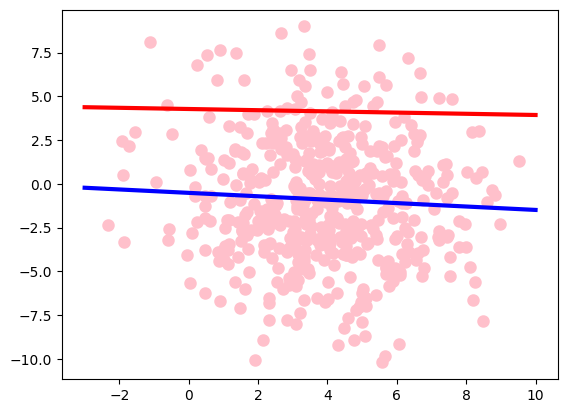

In [27]:
print(f"При коэффиценте корреляции: {r}")
plt.scatter(x, y, color="pink", linewidth=3)
plt.plot(np.linspace(-3, 10, 1000), list(map(reg_Y_X, np.linspace(-3, 10, 1000))), color="blue", linewidth=3)
plt.plot(np.linspace(-3, 10, 1000), list(map(reg_X_Y, np.linspace(-3, 10, 1000))), color="red",  linewidth=3)
plt.show()

### 3.3.3 Наблюдения

При изменении коэффицента корреляции меняется и график.<br/><br/>
Например:
<br/>&emsp;При $r_{XY}=0.8$:<br/> ![r=0.8](r_coef_08.png)
<br/>&emsp;При $r_{XY}=0.9$:<br/> ![r=0.9](r_coef_09.png)
<br/>&emsp;При $r_{XY}=0.95$:<br/> ![r=0.95](r_coef_095.png)
<br/>&emsp;При $r_{XY}=0.99$:<br/> ![r=0.99](r_coef_099.png)
<br/><br/><br/>
Как видно при приближении $r_{XY}$ к 1, значения случайной величины кучкуются около функций регрессии.